## Question 1

### 1. A student answers a multiple choice examination with two questions that have four possible answers each. Suppose that the probability that the student knows the answer to a question is 0.65 and the probability that the student guesses is 0.35. If the student guesses, the probability of guessing the correct answer is 0.25. The questions are independent, that is, knowing the answer on one question is not influenced by the other question.

### a. What is the probability that both questions will be answered correctly?

In [13]:
# Prior Probabilities of Knowledge and Guessing
prior_knowledge = 0.65
prior_guess = 0.35

# Likelihoods of Knowledge and Guessing for correct and wrong answers
guess_right = 0.25  # P( Guess | Right )
guess_wrong = 1 - guess_right  # P( Guess | Wrong ), the complement of guessing right

knowledge_right = 1  # P( Knowledge | Right )
knowledge_wrong = 0  # P( Knowledge | Wrong ), since if the student knows the answer, they get it right

# Solve for P( Right | Knowledge ) and P( Right | Guess )
# Probability of answering correctly on one question
Prob_Answered_Both_right_1 = (prior_knowledge * knowledge_right) + (prior_guess * guess_right)  # For Question 1
Prob_Answered_Both_right_2 = (prior_knowledge * knowledge_right) + (prior_guess * guess_right)  # For Question 2 (independent)

# Probabilities for both questions are the same due to independence
Answer1 = Prob_Answered_Both_right_1 * Prob_Answered_Both_right_2

print('Probability of both questions being answered correctly is: ', Answer)


Probability of both questions being answered correctly is:  0.54390625


### b. Suppose both questions were answered correctly. What is the probability that the student really knew the correct answer to both questions?

In [15]:
#Solve for P(Knowledge for both questions| Answered both questions correctly)
knowledge_right_for_both = knowledge_right * knowledge_right # This is the prior of knowing both questions 
prob_knew_both = prior_knowledge * prior_knowledge # This is the the student knew the answer to both questions
prob_answer_both = Answer1 # This is the probability of answering both questions correctly

# Bayes' Theorem
Answer2 = (knowledge_right_for_both * prob_knew_both) / prob_answer_both # P( Knowledge for both questions | Answered both questions correctly )

print('Probaility of knowing both correct answers: ', Answer2)

Probaility of knowing both correct answers:  0.7767882792301063


Applying Bayes' Theorem:

$$
P(\text{Knew both} \mid \text{Both correct}) = \frac{P(\text{Both correct} \mid \text{Knew both}) \cdot P(\text{Knew both})}{P(\text{Both correct})}
$$

Where:

- $$P(\text{Both correct} \mid \text{Knew both}) = 1$$  
  (If the student knew both answers, they will surely answer both correctly.)

- $$P(\text{Knew both}) = P(K) \cdot P(K) = 0.65 \cdot 0.65 = 0.4225$$

- $$P(\text{Both correct}) (calculated in part (a)) = 0.5449$$

Substituting these values:

$$
P(\text{Knew both} \mid \text{Both correct}) = \frac{1 \cdot 0.4225}{0.5449} \approx 0.7757
$$


### c. How would you generalize the above from 2 to n questions, that is, what are answers to (a) and (b) if the test has n independent questions? What happens to probabilities in (a) and (b) if n →∞.

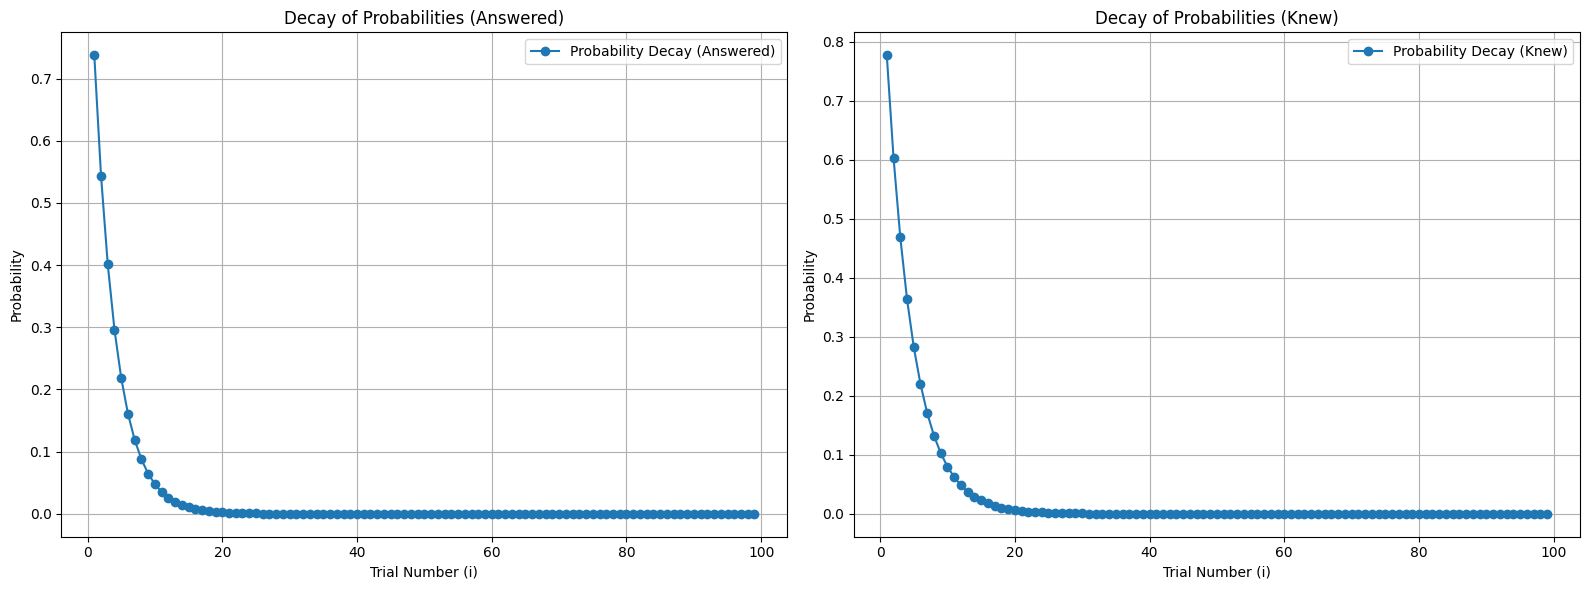

In [25]:
import matplotlib.pyplot as plt

prob = [] 
prob2 = []

for i in range(1, 100):
    prob.append(Prob_Answered_Both_right_1 ** i)

for i in range(1, 100):
    prob2.append(Answer2 ** i)
    
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the first data
axes[0].plot(range(1, 100), prob, marker='o', linestyle='-', label='Probability Decay (Answered)')
axes[0].set_title("Decay of Probabilities (Answered)")
axes[0].set_xlabel("Trial Number (i)")
axes[0].set_ylabel("Probability")
axes[0].grid(True)
axes[0].legend()

# Plot the second data
axes[1].plot(range(1, 100), prob2, marker='o', linestyle='-', label='Probability Decay (Knew)')
axes[1].set_title("Decay of Probabilities (Knew)")
axes[1].set_xlabel("Trial Number (i)")
axes[1].set_ylabel("Probability")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()



**Even if all questions are answered correctly, the probability that the student actually knew all the answers approaches zero. This is because the likelihood of guessing correctly dominates as number of questions grow.**

## Question 2
<div style="text-align: center;">
    <img src="ElectricCircuit.png" alt="Alt Text" style="width: 50%;"/>
</div>


### a) Find the probability that the circuit is operational during time interval T.
### Circuit Reliability Formulas

1. **Series Configuration**:  
   $$P_{\text{series}} = \prod_{i=1}^{n} P_i \quad \text{(e.g., for two components: } P_{\text{series}} = P(A) \cdot P(B))$$

2. **Parallel Configuration**:  
   $$P_{\text{parallel}} = 1 - \prod_{i=1}^{n} (1 - P_i) \quad \text{(e.g., for two components: } P_{\text{parallel}} = 1 - (1 - P(A)) \cdot (1 - P(B)))$$

In [47]:
# Probabilities of components
e1, e2, e3, e4, e5, e6, e7 = 0.5, 0.4, 0.1, 0.6, 0.9, 0.8, 0.7

#For when circuit 6 is operational

# Step 1: Compute Path 1 (e1 and e5 in parallel)
Path1 = (1 - (1 - e1) * (1 - e5))
print('Path1 (e1 and e5 in parallel):', Path1)

# Step 2: Compute Path 2 (e2, e3, and e4 in parallel)
Path2 = (1 - (1 - e2) * (1 - e3) * (1 - e4))
print('Path2 (e2, e3, and e4 in parallel):', Path2)

# Step 3: Combine Path2 parralel with e7
Path2 = 1 - ((1 - Path2) * (1 - e7))
print('Path2 after combining e7 (Parrallel):', Path2)

# Step 4: Combine Path1 and Path2 in series
Circuit_Operational = Path1 * Path2
print('Probability of operational circuit 6:', Circuit_Operational)

print('-------------------------------------------------')
print('Non-operational Circuit 6')
#For when circuit 6 is not operational, e1 and (e2, e3, e4) are in series with e5 and e7 in parallel
# Step 1: Compute Path 1 (e2, e3, and e4 in parallel)
Path1 = (1 - (1 - e2) * (1 - e3) * (1 - e4))
print('Path1 (e2, e3, and e4 in parallel):', Path1)

# Step 2: Compute Path 1 (e1 and path1 in series)
Path1 = e1 * Path1
print('Path1 (e1 and path1 in series):', Path1)

# Step 3: Combine e5 and e7 in series
Path2 = e5 * e7
print('Path2 (e5 and e7 in series):', Path2)

# Step 4: Combine Path1 and Path2 in parallel
Circuit_nonop = 1 - ((1 - Path1) * (1 - Path2))
print('Probability of Non-op circuit 6:', Circuit_nonop)

print('-------------------------------------------------')
#Probability of Operational Circuit
# Combine the two probabilities
Circuit = Circuit_Operational * (e6)+ Circuit_nonop * (1- e6)
print('Probability of Operational Circuit:', Circuit)

      

Path1 (e1 and e5 in parallel): 0.95
Path2 (e2, e3, and e4 in parallel): 0.784
Path2 after combining e7 (Parrallel): 0.9352
Probability of operational circuit 6: 0.88844
-------------------------------------------------
Non-operational Circuit 6
Path1 (e2, e3, and e4 in parallel): 0.784
Path1 (e1 and path1 in series): 0.392
Path2 (e5 and e7 in series): 0.63
Probability of Non-op circuit 6: 0.77504
-------------------------------------------------
Probability of Operational Circuit: 0.86576


### b) If the circuit was found operational at the time T , what is the probability that the element E6 was operational.

In [48]:
# Probability that the element E6 was operational. Apply Bayes Rule
prob_e6 = (Circuit_Operational * e6) / Circuit
print('Probability that element E6 was operational:', prob_e6)

Probability that element E6 was operational: 0.8209573091849937


## Question 3